In [10]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [11]:
# Dataset and image settings
DATASET_PATH = r"D:\6. WIN SEM -- 2024-2025\F1. DL\Child Surveillance DL Project\Datasets\1. Face Recognition\CriminalFace\Srinivas"
IMG_SIZE = 200

In [12]:
X = []
y = []

def extract_name(filename):
    return filename.split("_")[0]  # Only take name before underscore

for file in os.listdir(DATASET_PATH):
    if file.endswith((".jpg", ".jpeg", ".png")):
        label = extract_name(file)
        path = os.path.join(DATASET_PATH, file)
        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img / 255.0)  # Normalize
            y.append(label)

X = np.array(X)
y = np.array(y)
print(f"Loaded {len(X)} images with {len(set(y))} unique classes.")


Loaded 50 images with 1 unique classes.


In [13]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Optional: see label mappings
print("Label Mapping:")
for idx, name in enumerate(le.classes_):
    print(f"{idx}: {name}")


Label Mapping:
0: Srinivas


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 40
Testing samples: 10


In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 128)      

In [16]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    batch_size=8
)


Epoch 1/10


C:\Users\kanth\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(8, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

C:\Users\kanth\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 3s 337ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 1s 269ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 1s 260ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 1s 271ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 1s 269ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 1s 269ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 1s 261ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+0

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss * 100:.2f}")
print(f"Test Accuracy: {accuracy * 100:.2f}")


1/1 [==============================] - 0s 259ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss: 0.00
Test Accuracy: 100.00


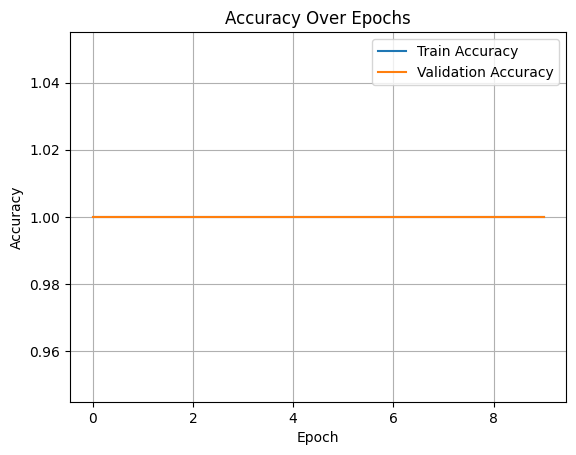

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


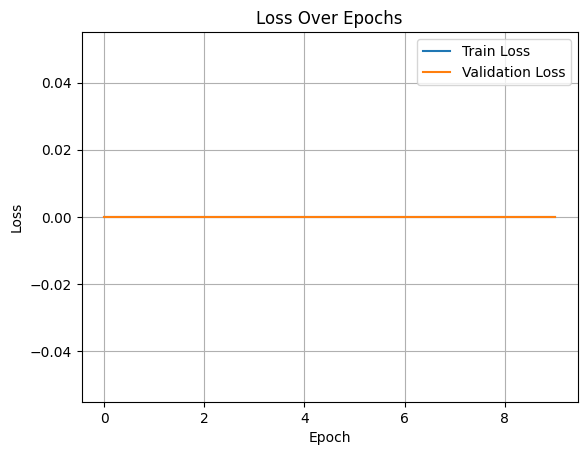

In [22]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
model.save("criminal_detection.keras")